In [ ]:
words = open('names.txt', 'r').read().splitlines()

import torch
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0


In [4]:
#create training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs) #.Tensor infers float
ys = torch.tensor(ys)
    

. e
e m
m m
m a
a .


In [5]:
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys

tensor([ 5, 13, 13,  1,  0])

when 0 put in we want 5 to have high prob
when 5 in 13 high prob...
so 5 separate input examples in this case

In [11]:
#how we will feed into nn
# doesnt make sense for input neuron to take integer values
# instead we will use one-hot encoding
#turns integer into vector of 0s and 1s (13 turns into column vector of length 27 with 1 at index 13)
#can do this with torch.nn.functional.one_hot(tensor, num_classes) -> longtensor

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27) #can feed in entire tensor at once 

In [9]:
xenc.shape  #(number of examples, number of classes)

torch.Size([5, 27])

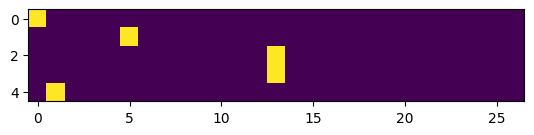

In [10]:
import matplotlib.pyplot as plt
plt.imshow(xenc.float())  #convert to float for visualization
#appropiate bit turned on for each example
#output datatype is int64 (returns same dtype as input)
#can convert to float with .float() method

In [12]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
#now to pass into neuron

W = torch.randn((27,1))  #fills tensor with random numbers from normal distribution
xenc @ W #matrix multiplication (5 , 27)  @ (27,1) -> (5,1)

tensor([[ 1.4453],
        [ 0.9170],
        [-0.5546],
        [-0.5546],
        [ 0.7235]])

In [16]:
W = torch.randn((27, 27))
xenc @ W  #(5,27) @ (27,27) -> (5,27)
#these elements tell us that for every one of 27 neurons that we created what is the firing rate of those neurons on every one of the 5 examples

tensor([[ 1.3577,  0.1210, -2.0068, -1.0626, -1.0904,  0.7692, -0.8236, -1.2457,
         -1.6808, -1.2347, -0.5765, -0.8388,  0.0175,  0.2182, -1.3149,  1.3263,
         -1.1834,  1.6150,  0.8474, -0.3994, -1.6255,  0.4980, -0.2954,  0.6282,
          0.6369, -1.5622,  0.8183],
        [ 1.0064,  0.1300,  0.8036,  0.1796,  0.3538, -0.8217, -0.6958,  1.0473,
          0.6660, -0.2253,  0.2193,  1.0073, -0.3881, -1.7428, -0.0334,  0.1420,
         -0.3187,  1.4603,  0.2228, -0.5078,  0.2423, -2.0276,  0.0284, -0.1934,
         -0.1156, -0.5191, -1.8158],
        [ 1.6236, -0.3304,  1.4046,  0.4704, -0.0358,  1.4930,  2.2963,  1.1229,
         -0.0979, -0.2318, -0.3129,  0.5125, -0.4524,  2.0868, -0.3571, -0.8744,
         -2.2828, -0.8158, -0.5197, -0.0500, -1.4561, -0.6296,  0.6833,  0.7439,
         -0.6422, -0.0243, -2.0719],
        [ 1.6236, -0.3304,  1.4046,  0.4704, -0.0358,  1.4930,  2.2963,  1.1229,
         -0.0979, -0.2318, -0.3129,  0.5125, -0.4524,  2.0868, -0.3571, -0.8744

In [17]:
(xenc @ W)[3,13] #firing rate of neuron 13 on example 3

tensor(2.0868)

In [18]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
W[:,13] 

tensor([ 0.2182,  0.0412, -0.2255, -0.4301, -0.4551, -1.7428,  1.8931, -0.0060,
         0.3698, -1.1300, -2.1092,  2.6099, -0.4406,  2.0868, -1.2045, -0.4294,
        -0.4803, -1.0408,  0.8779,  0.2498, -0.0324,  0.8838, -1.1279,  0.3771,
        -0.7034,  0.4109,  0.4039])

In [22]:
xenc[3] @ W[:,13]  #same result, firing rate of neuron 13 on example 3

tensor(2.0868)

In [24]:
#basically just get rows of W that correspond to xs
#we will have one layer with 27 neurons with 27 inputs without any nonlinearity
#this is called a linear layer

#want numbers to represnt probabilities for next character (just positive and negative number right now)

#neural net will output log counts for each character

#exp makes negative numbers small + below 1 and positive numbers large > 1
(xenc @ W).exp()  #nn now predicting counts for each character

tensor([[3.8873, 1.1286, 0.1344, 0.3456, 0.3361, 2.1581, 0.4389, 0.2877, 0.1862,
         0.2909, 0.5618, 0.4322, 1.0176, 1.2439, 0.2685, 3.7669, 0.3062, 5.0277,
         2.3336, 0.6707, 0.1968, 1.6454, 0.7442, 1.8743, 1.8906, 0.2097, 2.2667],
        [2.7357, 1.1388, 2.2336, 1.1967, 1.4245, 0.4397, 0.4987, 2.8499, 1.9464,
         0.7983, 1.2452, 2.7383, 0.6784, 0.1750, 0.9671, 1.1526, 0.7271, 4.3071,
         1.2496, 0.6018, 1.2741, 0.1317, 1.0288, 0.8241, 0.8908, 0.5951, 0.1627],
        [5.0715, 0.7186, 4.0738, 1.6006, 0.9648, 4.4504, 9.9370, 3.0736, 0.9067,
         0.7931, 0.7313, 1.6694, 0.6361, 8.0587, 0.6997, 0.4171, 0.1020, 0.4423,
         0.5947, 0.9513, 0.2331, 0.5328, 1.9804, 2.1041, 0.5261, 0.9760, 0.1259],
        [5.0715, 0.7186, 4.0738, 1.6006, 0.9648, 4.4504, 9.9370, 3.0736, 0.9067,
         0.7931, 0.7313, 1.6694, 0.6361, 8.0587, 0.6997, 0.4171, 0.1020, 0.4423,
         0.5947, 0.9513, 0.2331, 0.5328, 1.9804, 2.1041, 0.5261, 0.9760, 0.1259],
        [0.9179, 1.5002,

In [26]:
logits = xenc @ W #log counts
counts = logits.exp()  #actual counts equivalent to N matrix
probs = counts / counts.sum(1, keepdim=True)  #normalize to get probabilities
probs #how likely each character is to come next given input character
#as we tune W these probabilities will get better and better(right now they are random)

tensor([[0.1155, 0.0335, 0.0040, 0.0103, 0.0100, 0.0641, 0.0130, 0.0086, 0.0055,
         0.0086, 0.0167, 0.0128, 0.0302, 0.0370, 0.0080, 0.1119, 0.0091, 0.1494,
         0.0693, 0.0199, 0.0058, 0.0489, 0.0221, 0.0557, 0.0562, 0.0062, 0.0674],
        [0.0804, 0.0335, 0.0657, 0.0352, 0.0419, 0.0129, 0.0147, 0.0838, 0.0572,
         0.0235, 0.0366, 0.0805, 0.0199, 0.0051, 0.0284, 0.0339, 0.0214, 0.1266,
         0.0367, 0.0177, 0.0375, 0.0039, 0.0302, 0.0242, 0.0262, 0.0175, 0.0048],
        [0.0968, 0.0137, 0.0778, 0.0306, 0.0184, 0.0850, 0.1897, 0.0587, 0.0173,
         0.0151, 0.0140, 0.0319, 0.0121, 0.1539, 0.0134, 0.0080, 0.0019, 0.0084,
         0.0114, 0.0182, 0.0045, 0.0102, 0.0378, 0.0402, 0.0100, 0.0186, 0.0024],
        [0.0968, 0.0137, 0.0778, 0.0306, 0.0184, 0.0850, 0.1897, 0.0587, 0.0173,
         0.0151, 0.0140, 0.0319, 0.0121, 0.1539, 0.0134, 0.0080, 0.0019, 0.0084,
         0.0114, 0.0182, 0.0045, 0.0102, 0.0378, 0.0402, 0.0100, 0.0186, 0.0024],
        [0.0213, 0.0348,

exponentiating and then normalizing logits = softmax function
-can put it inside any linear layer and it makes up probabilities

bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465

In [122]:
#we will commit to this random W and optimizing it via gradient descent 

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad = True) #random init of weights



In [107]:
#forward pass:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [108]:
#labels stored in ys
#probs is softmax of W[xs]

# for n in range(len(xs)):
#     print(probs[n,ys[n]])

loss = probs[torch.arange(len(xs)), ys]
loss = -loss.log().mean() #negative log likelihood


In [109]:
print(loss.item())

3.7291626930236816


In [110]:
#backward pass
W.grad = None #zero grad
loss.backward() #make sure requires_grad = True for W
#W.grad #shows influence of each weight on loss

In [111]:
W.data += -0.1 * W.grad #gradient descent step

In [123]:
for k in range(10000):
    #forward pass:
    xenc = F.one_hot(xs, num_classes=27).float() 
    logits = xenc @ W 
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True) 
    loss = probs[torch.arange(len(xs)), ys]
    loss = -loss.log().mean() 

    #backward pass
    W.grad = None 
    loss.backward() 
    W.data += -1 * W.grad

    print(k, loss.item())


0 3.7693049907684326
1 3.5693678855895996
2 3.373957872390747
3 3.1835389137268066
4 2.998565196990967
5 2.8194680213928223
6 2.6466495990753174
7 2.4804797172546387
8 2.3212974071502686
9 2.1694142818450928
10 2.025116205215454
11 1.8886604309082031
12 1.760268211364746
13 1.640109658241272
14 1.5282872915267944
15 1.4248181581497192
16 1.3296207189559937
17 1.2425073385238647
18 1.1631876230239868
19 1.0912787914276123
20 1.0263240337371826
21 0.9678155183792114
22 0.9152162671089172
23 0.8679835200309753
24 0.8255858421325684
25 0.7875170707702637
26 0.7533054351806641
27 0.7225187420845032
28 0.6947660446166992
29 0.6696981191635132
30 0.6470049619674683
31 0.6264129877090454
32 0.6076816916465759
33 0.5906006097793579
34 0.5749852061271667
35 0.5606743097305298
36 0.5475269556045532
37 0.5354197025299072
38 0.5242441892623901
39 0.5139055252075195
40 0.5043203234672546
41 0.4954148232936859
42 0.4871242642402649
43 0.47939103841781616
44 0.47216445207595825
45 0.46539896726608276


In [135]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [136]:
(W**2).mean()  #accumulates the loss

tensor(0.9665, grad_fn=<MeanBackward0>)

In [137]:
# gradient descent
for k in range(10):
  
  # forward pass
  # xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  # logits = xenc @ W # predict log-counts
  logits = W[xs]
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() #corresponds to adding counts to all weights
  #tries to make all the probabilities work out and all the weights zero
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.76861834526062
3.378788471221924
3.1610827445983887
3.02718186378479
2.9344804286956787
2.8672289848327637
2.816653251647949
2.777146100997925
2.7452542781829834
2.7188305854797363


If you push the weights of W towards zero ->smoothing
-> all characters equally likely
-> regularization technique
-> prevents overfitting
-> adds gravity towards zero but run into issue of over-smoothing

In [138]:
#sampling from the model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


dexzmalegllusailezktxha.
kllimittain.
lgdan.
ka.
da.
